# Lecture 5 : Word2vec | CBOW and Skip-gram | Game of Thrones Word2vec

https://www.youtube.com/watch?v=DDfLc5AHoJI&list=PLKnIA16_RmvZo7fp5kkIth6nRTeQQsjfX&index=5

## Word Embeddings

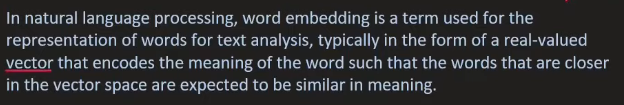

### Types :


1. __Frequency__
    - Bag of Words
    - Tf-idf
    - Glove (Matrix Factorization)



2. __Prediction__
    - Word2vec

## Word2vec

Word2Vec is a widely used word embedding technique that represents words as dense vectors in a high-dimensional space. 


Here's a simple explanation:


- __Word representation:__ Word2Vec learns to represent words as continuous vectors based on their surrounding context in a large corpus of text.


- __Contextual similarity:__ Words with similar meanings or usage tend to have similar vector representations. The vector space captures semantic relationships between words.


- __Dense vectors:__ Unlike traditional one-hot encoding, Word2Vec generates dense vectors where each element holds a real-valued number. These vectors capture more nuanced information about word relationships.


- __Training methods:__ Word2Vec can be trained using two main algorithms: Continuous Bag-of-Words (CBOW) and Skip-gram. CBOW predicts a target word from its context, while Skip-gram predicts context words from a target word.


- __Applications:__ Word2Vec has proven useful in various natural language processing tasks, such as semantic similarity, word analogy, text classification, and language generation.

### Advantages:


- __Captures semantic relationships:__ Word2Vec captures semantic similarities and relationships between words. Words with similar meanings or usage tend to have similar vector representations, allowing for better understanding of word context. Like catches similarity between happy and joy.


- __Dimensionality reduction:__ Word2Vec represents words as dense vectors in a lower-dimensional vectors compared to one-hot encoding or sparse representations. This reduces the memory and computational requirements for storing and processing word representations.


- __Dense vector :__ Less sparsity i.e mostly non-zero numbers. Avoids Overfitting


- __Generalization:__ Word2Vec learns from large corpora and can generalize knowledge to unseen words or text. It can infer similarities and relationships between words even if they were not present during training.


- __Efficiency:__  Once trained, Word2Vec models can quickly provide word embeddings for downstream tasks. These pre-trained models can be used in various applications without the need for retraining.


- __Versatility:__  Word2Vec has been successfully applied in a wide range of natural language processing tasks, such as document classification, sentiment analysis, named entity recognition, and machine translation.

### Using pre-trained model

In [1]:
import gensim

In [2]:
from gensim.models import Word2Vec, KeyedVectors

In [3]:
import wget

### Intuition

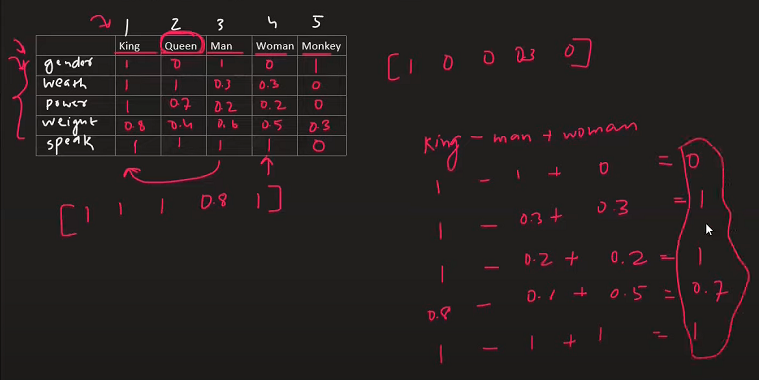

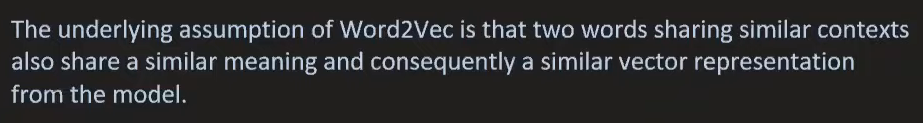

## Types of Word2vec

1. __CBow (Continuos bag of words) :__ CBOW predicts the target word based on the context words surrounding it. It is efficient and works well for frequent words.


2. __Skip-grams :__ Skip-gram predicts the surrounding context words given a target word. It handles rare words better and captures fine-grained word relationships.


## 1. CBow - Continuos bag of words

__Given context word, you have to predict target words__

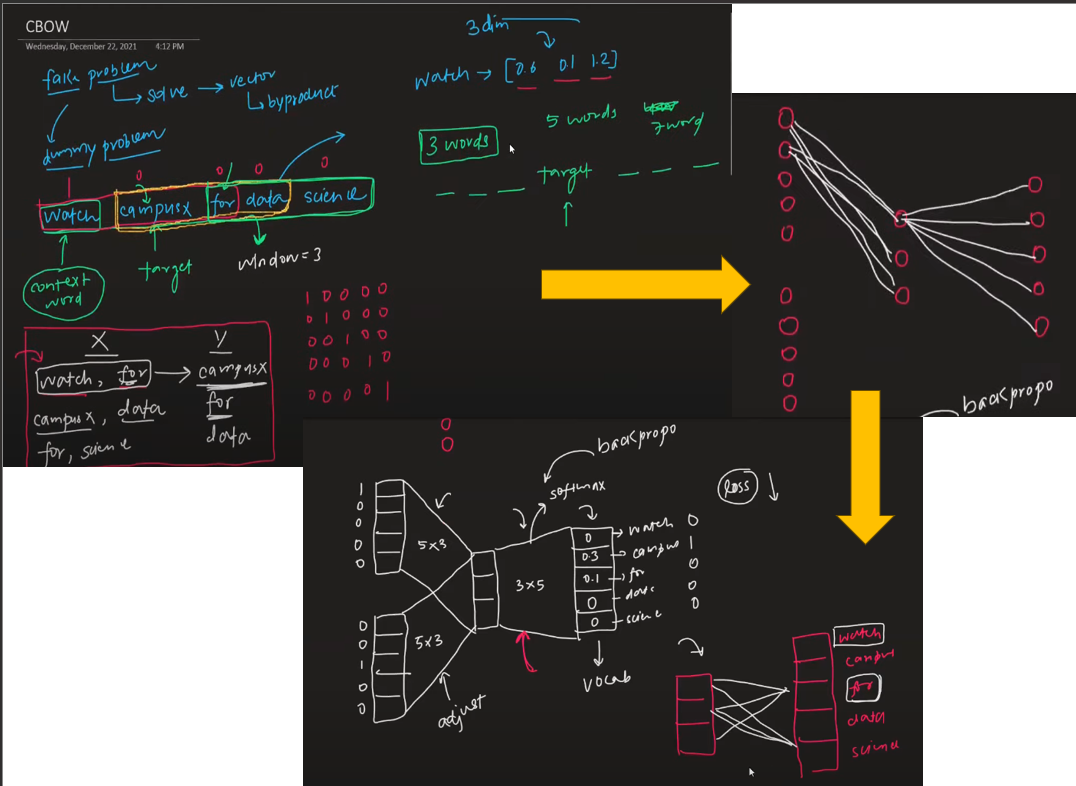

## 2. Skip-grams

__Given target word, you have to predict context words__

## Difference between CBOW and skipgrams

The main difference between Skip-gram and Continuous Bag-of-Words (CBOW) models lies in the direction of prediction and the training objective. Here are the key distinctions:

1. Prediction Direction:
   - CBOW: In CBOW, the model predicts the target word based on the surrounding context words.
   - Skip-gram: In Skip-gram, the model predicts the surrounding context words given a target word.

2. Context Window:
   - CBOW: CBOW typically uses a fixed-sized context window around the target word, considering the neighboring words as the context.
   - Skip-gram: Skip-gram also employs a context window, but it focuses on one target word at a time and aims to predict the surrounding context words.

3. Training Objective:
   - CBOW: The training objective of CBOW is to maximize the likelihood of predicting the target word given the context words. It tries to find the most likely target word based on the context.
   - Skip-gram: The training objective of Skip-gram is to maximize the likelihood of predicting the context words given a target word. It aims to capture the relationships between the target word and its context.

4. Performance with Word Frequency:
   - CBOW: CBOW performs well with frequent words as it learns to generalize from the context of common words.
   - Skip-gram: Skip-gram is more effective in handling infrequent or rare words as it focuses on capturing the context of individual target words.



__In summary, CBOW is more efficient and suitable for larger datasets, providing a broader understanding of word meaning based on context.__


__On the other hand, Skip-gram is better at capturing fine-grained relationships between words, particularly for infrequent words.__

### How to improve word2vec

1. Increase training data


2. Increase nodes in hidden layer


3. increase window size

In [4]:
import pandas as pd
import numpy as np

In [5]:
import os
import gensim

In [6]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [7]:
story = []

In [8]:
location = r'D:\NLP\datasets\got'

In [9]:
for filename in os.listdir(location):
    
    f = open(os.path.join(location,filename)) # reading each file from GOT folder
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent)) # preprocessing using simple_preprocessor and appending in story list

In [10]:
len(story) # total sentences in all the books

145020

In [11]:
story # 2-D list

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


In [12]:
model = gensim.models.Word2Vec(
    window = 10, # 10 words on both side of center words
    min_count=2 # consider sentences with atleast 2 words
)

In [13]:
model.build_vocab(story)

In [14]:
model.train(story, total_examples=model.corpus_count, epochs=10)

(13140336, 17256380)

In [15]:
model.wv.most_similar('daenerys')

[('stormborn', 0.7448738217353821),
 ('targaryen', 0.7004067897796631),
 ('viserys', 0.6035400629043579),
 ('unburnt', 0.5975254774093628),
 ('queen', 0.5927247405052185),
 ('myrcella', 0.5922016501426697),
 ('dragons', 0.5776450037956238),
 ('dragon', 0.565581738948822),
 ('aegon', 0.5641258358955383),
 ('princess', 0.5591925978660583)]

In [16]:
model.wv.most_similar('joffrey')

[('tommen', 0.7801735401153564),
 ('joff', 0.7091037034988403),
 ('robert', 0.6778018474578857),
 ('myrcella', 0.6760041117668152),
 ('margaery', 0.6573194861412048),
 ('cersei', 0.6435299515724182),
 ('viserys', 0.6381435990333557),
 ('tornmen', 0.6287649869918823),
 ('renly', 0.6211498975753784),
 ('aerys', 0.6182370185852051)]

In [17]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [18]:
model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [19]:
# vector representaion of king

model.wv['king']

array([ 0.35469458, -1.2006062 ,  2.348753  ,  2.6769922 , -1.9057571 ,
       -1.213634  ,  2.1469758 , -1.4896061 , -2.5355148 ,  0.38402665,
       -0.302917  , -0.54289865, -0.38966537,  1.3312789 , -4.617229  ,
       -1.4853377 , -0.9669093 ,  2.7668161 , -0.13825566, -0.05598203,
        1.4842076 ,  0.4326054 ,  2.1727781 , -3.6990118 , -2.5709972 ,
        2.210963  , -1.6490961 , -0.88603854,  0.9825539 ,  2.1551957 ,
       -3.0846214 , -1.029695  ,  0.9140764 , -0.71829677,  3.8925443 ,
       -3.2388906 , -4.154607  ,  0.01468329,  0.5976009 , -0.233526  ,
       -1.7729397 , -0.01300796,  3.0092247 ,  0.19541167, -1.3986652 ,
        0.16762164, -0.40635163, -2.321209  ,  1.5566052 , -3.214147  ,
       -3.9181848 , -3.1251278 , -1.651294  , -4.351708  ,  3.1933355 ,
       -2.209801  ,  0.14377356, -0.40917304, -1.1936524 ,  0.9855515 ,
        0.1521023 ,  0.48811245,  0.447211  , -1.6253158 ,  1.8468384 ,
        3.170861  , -0.23323129, -1.7328049 ,  0.99740803, -3.51

In [20]:
model.wv.similarity('arya','sansa')

0.7871557

In [21]:
model.wv.similarity('tywin','sansa')

0.1932228

### Plotting graph in 3-D

In [22]:
model.wv.get_normed_vectors() # vector represntation of each word

array([[-0.10489896, -0.09724522,  0.05531714, ...,  0.03476008,
         0.01365565,  0.08782539],
       [-0.15870601, -0.11190011,  0.1672608 , ...,  0.0656481 ,
         0.02241594,  0.01575496],
       [ 0.04681409, -0.15704441, -0.01153893, ...,  0.01788746,
         0.10355476, -0.05328532],
       ...,
       [ 0.093334  ,  0.08388142,  0.00850128, ..., -0.07150716,
        -0.01660079, -0.07493041],
       [-0.03366638,  0.17143273,  0.1772538 , ...,  0.01601496,
         0.05923958, -0.09419064],
       [-0.0305363 ,  0.10999359,  0.09140651, ...,  0.03796453,
        -0.06516785, -0.03909004]], dtype=float32)

In [23]:
model.wv.get_normed_vectors().shape # total unique words

(17453, 100)

In [24]:
y = model.wv.index_to_key

In [25]:
len(y)

17453

In [26]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'lord',
 'them',
 'no',
 'from',
 'would',
 'were',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'we',
 'could',
 'are',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'king',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'who',
 'down',
 'well',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'father',
 'old',
 'hand',
 'even',
 'too',
 'tyrion',
 'before',
 'never',
 'an',
 'off',
 'see',
 'know',
 'into',
 'made',
 'now',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'then',
 'how',
 'long',
 'has',
 'can',
 'might',
 'us',
 'come',
 'where',
 'here',
 'through',
 'still',
 'face',
 'head',
 'red',
 'll',
 'way',
 'boy',
 'page',
 'must',
 'once',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=3)

In [29]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [30]:
X.shape

(17453, 3)

In [31]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300]) # words between 200 and 300
fig.show()